## Aim
To implement K-Means clustering for color quantization in images using RGB and LAB color spaces, and analyze the clustering performance using silhouette scores and inertia.

## Objectives
1. Load and preprocess an image for clustering.
2. Implement K-Means clustering in RGB and LAB color spaces.
3. Analyze cluster performance using silhouette scores and elbow method.
4. Compare clustering results in different color spaces.
5. Visualize clustered images to observe color quantization.

## Theory
1. K-Means Clustering
K-Means is an unsupervised learning algorithm that partitions data into K clusters by minimizing the variance within clusters. It follows these steps:


*   Initialize K centroids randomly.
*   Assign each data point to the nearest centroid.
*   Compute new centroids as the mean of assigned points.
*   Repeat until centroids do not change significantly.


2. Color Spaces: RGB vs. LAB
RGB (Red, Green, Blue): A common color model used in digital images.
LAB (Luminance, A, B)**: A perceptual color model

3. Performance Metrics
Inertia: Measures how tight the clusters are. Lower inertia = better clustering.
Silhouette Score: Measures how well clusters are separated. Higher silhouette score = better clustering.
Elbow Method: A technique to find the optimal number of clusters (K) by plotting inertia vs. K

In [ ]:
# First install required libraries if not already available
!pip install matplotlib scikit-learn opencv-python Pillow scikit-image

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from skimage import io
from skimage.color import rgb2lab

In [ ]:
# Function to load an image and reshape it
def load_and_preprocess_image(image_path, color_space='rgb', resize_shape=(100, 100)):
    img = io.imread(image_path)

    # Resize image to speed up processing
    img = cv2.resize(img, resize_shape)

    if color_space == 'rgb':
        if img.shape[-1] == 3:
            return img.reshape((-1, 3))
        raise ValueError("Image is not in RGB format. Please provide an RGB image.")

    elif color_space == 'lab':
        img_lab = rgb2lab(img)
        return img_lab.reshape((-1, 3))  # Convert to LAB color space

    return img.reshape((-1, 3))

In [ ]:
# Function to downsample the data to speed up clustering
def downsample_data(data, num_samples=5000):
    if data.shape[0] > num_samples:
        indices = np.random.choice(data.shape[0], num_samples, replace=False)
        return data[indices]
    return data

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import random

In [ ]:
# Function to perform KMeans clustering
def kmeans_clustering(data, k=5):
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=1000, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    return kmeans, labels, centers

In [ ]:
# Optimized Performance Metrics Function
def plot_performance_metrics(kmeans, data):
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(data, kmeans.labels_)

    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Inertia: {inertia}")


    # Optimized Elbow Method (reducing K range for efficiency)
    distortions = []
    for i in range(2, 6):
        kmeans_temp = MiniBatchKMeans(n_clusters=i, batch_size=1000, random_state=42)
        kmeans_temp.fit(data)
        distortions.append(kmeans_temp.inertia_)

    # Elbow Method
    distortions = []
    silhouette_scores = []

    for i in range(2, 6):
        kmeans_temp = MiniBatchKMeans(n_clusters=i, batch_size=1000, random_state=42)
        kmeans_temp.fit(data)
        distortions.append(kmeans_temp.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans_temp.labels_))

    # Plot Elbow Method
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, 6), distortions, marker='o', label="Inertia")
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.legend()
    plt.show()

    # Plot Silhouette Scores
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, 6), silhouette_scores, marker='o', color='r', label="Silhouette Score")
    plt.title('Silhouette Score for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.show()

In [ ]:
# Function to visualize clusters
def plot_clusters(data, labels, centers, color_space='rgb'):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=5)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
    plt.title(f'KMeans Clusters in {color_space.upper()} Color Space')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

In [ ]:
# Load image (Change path to your own image)
image_path = "/content/parakeet.jpg"

In [ ]:
# Load and preprocess the image (RGB color space)
img_rgb = load_and_preprocess_image(image_path, color_space='rgb')

In [ ]:
# Downsample image data for faster processing
img_rgb_sampled = downsample_data(img_rgb)

In [ ]:
# Perform KMeans clustering in RGB color space
kmeans_rgb, labels_rgb, centers_rgb = kmeans_clustering(img_rgb_sampled, k=5)

Silhouette Score: 0.45309843205845735
Inertia: 7401104.90574045


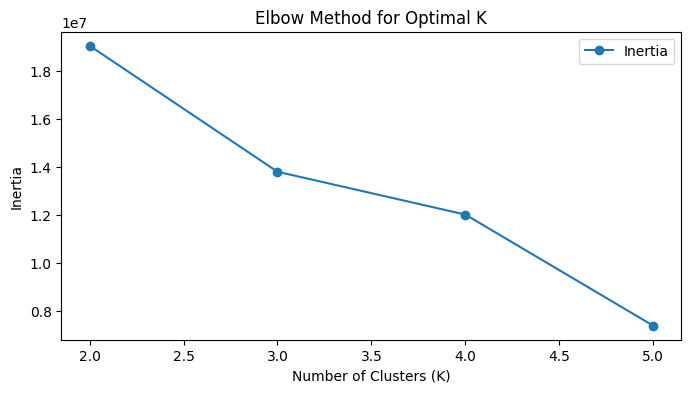

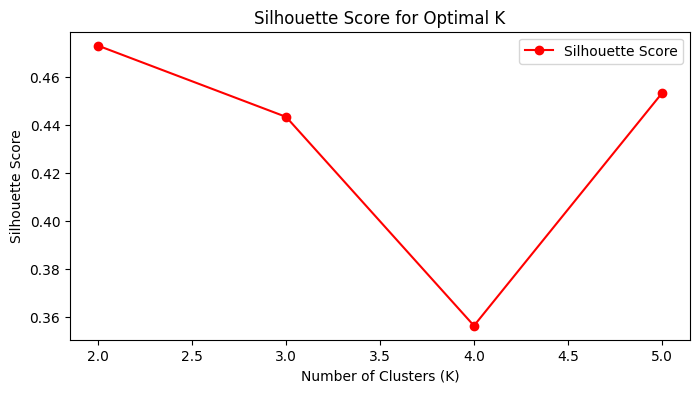

In [ ]:
# Performance metrics for RGB clustering
plot_performance_metrics(kmeans_rgb, img_rgb_sampled)

In [ ]:
# Convert to LAB color space
img_lab = load_and_preprocess_image(image_path, color_space='lab')

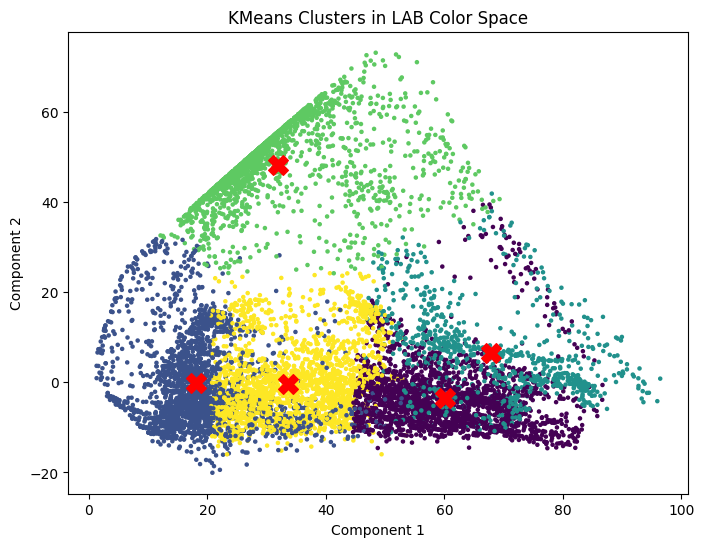

In [ ]:
# KMeans clustering in LAB color space
kmeans_lab, labels_lab, centers_lab = kmeans_clustering(img_lab, k=5)
plot_clusters(img_lab, labels_lab, centers_lab, color_space='lab')

Silhouette Score: 0.4143929932924633
Inertia: 2668778.008578564


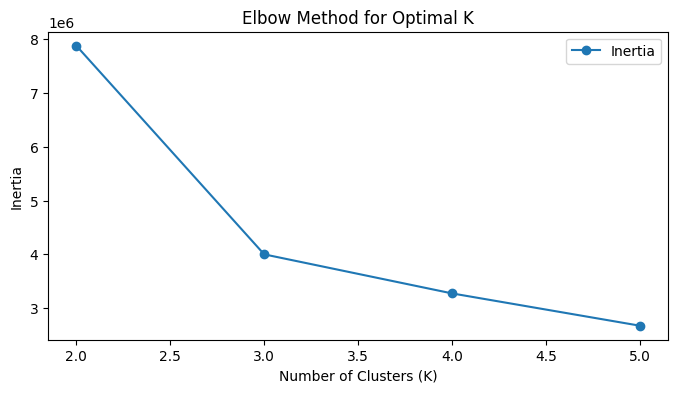

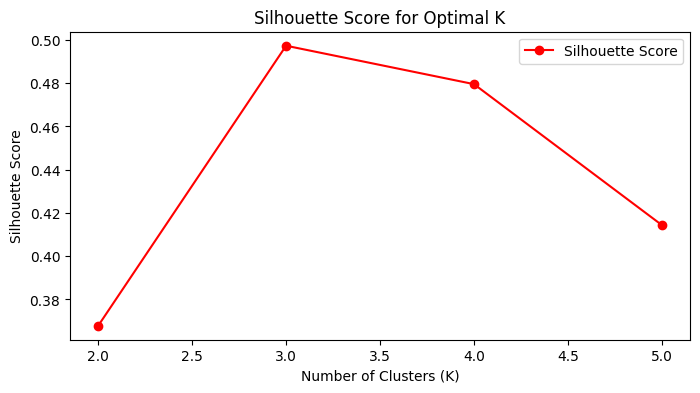

In [ ]:
# Performance metrics for LAB clustering
plot_performance_metrics(kmeans_lab, img_lab)

## Applications

1. Image Compression – Reducing the number of colors in an image while preserving its appearance.
2. bject Detection & Image Segmentation – Separating objects from the background in images.
3. Medical Imaging – Identifying regions of interest in scans like MRI or CT images.
4. Computer Vision & AI – Used in self-driving cars, facial recognition, and automated surveillance.
5. E-commerce & Fashion – Recommending color-based clothing and products.

## Conclusion
K-Means clustering effectively reduces the number of colors in an image while preserving its structure.

The LAB color space provides better clustering results than RGB due to its perceptual uniformity.

The elbow method helps determine the optimal number of clusters.

Silhouette scores confirm how well-defined the clusters are.

This technique is useful in real-world applications like image segmentation, compression, and AI-based vision tasks.